# 필요한 라이브러리 및 데이터셋 업로드


In [385]:
import numpy as np
import pandas as pd
import pickle

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [386]:
winner_df =  pd.read_pickle('rawData/match_winner_data_version1.pickle')
loser_df = pd.read_pickle('rawData/match_loser_data_version1.pickle')

In [387]:
# 승자와 패자 데이터 합치기
data = pd.concat([winner_df, loser_df], ignore_index=True)
data.info()

# win 데이터만 217646개로, 12개의 null값이 있는 걸 확인할 수 있다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217658 entries, 0 to 217657
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   teamId                217658 non-null  int64  
 1   win                   217646 non-null  object 
 2   firstBlood            217658 non-null  bool   
 3   firstTower            217658 non-null  bool   
 4   firstInhibitor        217658 non-null  bool   
 5   firstBaron            217658 non-null  bool   
 6   firstDragon           217658 non-null  bool   
 7   firstRiftHerald       217658 non-null  bool   
 8   towerKills            217658 non-null  int64  
 9   inhibitorKills        217658 non-null  int64  
 10  baronKills            217658 non-null  int64  
 11  dragonKills           217658 non-null  int64  
 12  vilemawKills          217658 non-null  int64  
 13  riftHeraldKills       217658 non-null  int64  
 14  dominionVictoryScore  217658 non-null  int64  
 15  

In [388]:
# 필요없는 열 제거
data.drop(['teamId', 'dominionVictoryScore', 'bans', 'gameId', 'vilemawKills'], axis=1, inplace=True)

In [389]:
# Fail을 Lose로 바꾸기
# data = data.replace({'win': {'Fail': 'Lose'}})

In [390]:
# 이상치 제거 (억제기 6번 이상 파괴)
data.drop(data.loc[data['inhibitorKills'] > 3].index, inplace=True)
winner_df.drop(winner_df.loc[winner_df['inhibitorKills'] > 3].index, inplace=True)
loser_df.drop(loser_df.loc[loser_df['inhibitorKills'] > 3].index, inplace=True)

In [391]:
# 타워 (타워 6번 이상 파괴)
data.drop(data.loc[data['towerKills'] > 4].index, inplace=True)
winner_df.drop(winner_df.loc[winner_df['towerKills'] > 4].index, inplace=True)
loser_df.drop(loser_df.loc[loser_df['towerKills'] > 4].index, inplace=True)

In [392]:
data.head()

,win,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,towerKills,inhibitorKills,baronKills,dragonKills,riftHeraldKills
1,Win,False,False,False,False,True,True,4,0,0,2,2
9,Win,False,True,False,False,True,True,4,0,0,1,2
10,Win,False,False,False,False,False,False,0,0,0,0,0
13,Win,False,False,False,False,True,False,2,0,0,3,0
18,Win,True,False,False,False,True,False,1,0,0,2,0


# 데이터셋 전처리

## null 값 확인 및 제거

In [393]:
# 217658개중 null값이 있는 데이터는 12개로 적으니 제거하는 방법을 선택합니다.
data = data.dropna(axis=0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128122 entries, 1 to 217657
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   win              128122 non-null  object
 1   firstBlood       128122 non-null  bool  
 2   firstTower       128122 non-null  bool  
 3   firstInhibitor   128122 non-null  bool  
 4   firstBaron       128122 non-null  bool  
 5   firstDragon      128122 non-null  bool  
 6   firstRiftHerald  128122 non-null  bool  
 7   towerKills       128122 non-null  int64 
 8   inhibitorKills   128122 non-null  int64 
 9   baronKills       128122 non-null  int64 
 10  dragonKills      128122 non-null  int64 
 11  riftHeraldKills  128122 non-null  int64 
dtypes: bool(6), int64(5), object(1)
memory usage: 7.6+ MB


## 범주형 데이터 처리

In [394]:
# https://stackoverflow.com/questions/43515877/should-binary-features-be-one-hot-encoded (True-False)
# True / False의 이진 범주형 데이터이므로 더미변수로 나타내줍니다.

# 범주형 데이터일 경우에는 반드시 One-Hot Encording을 해야합니다.
# 하지만 True/False, Male/Female과 같이 Binary feature는 하나의 값을 알면 다른 값을 알 수 있습니다.
# 따라서 중복 열을 제거하고, 하나의 열에 0, 1로 표기하는 결과와 같은 label Encording을 이용합니다.

In [395]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
for i in range(0,8):
    x = list(data.iloc[:,i])
    
    le.fit(x)
    res = le.transform(x) 
    
    data.iloc[:,i] = res

In [396]:
data.head()

,win,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,towerKills,inhibitorKills,baronKills,dragonKills,riftHeraldKills
1,1,0,0,0,0,1,1,4,0,0,2,2
9,1,0,1,0,0,1,1,4,0,0,1,2
10,1,0,0,0,0,0,0,0,0,0,0,0
13,1,0,0,0,0,1,0,2,0,0,3,0
18,1,1,0,0,0,1,0,1,0,0,2,0


# 모델학습

## 데이터 분할 (train, test set)

In [397]:
target = data.iloc[:,0]
trainData = data.iloc[:,1:]

In [398]:
# stratify를 win으로 설정해서, 승리 및 패배가 한 쪽으로 쏠려서 분배되는 걸 방지합니다.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(trainData, target, test_size=0.2, stratify=data['win'], shuffle=True, random_state=42)

In [399]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(102497, 11) (25625, 11) (102497,) (25625,)


In [400]:
#표준화
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_scaled = ss.fit_transform(X_train)
y_scaled = ss.transform(X_test)

In [401]:
#정규화
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
X_scaled = ms.fit_transform(X_train)
y_scaled = ms.transform(X_test)

In [402]:
#RobustScaler
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
X_scaled = rs.fit_transform(X_train)
y_scaled = rs.transform(X_test)

In [403]:
X_train.head()

,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,towerKills,inhibitorKills,baronKills,dragonKills,riftHeraldKills
65126,1,1,1,0,1,0,4,1,0,2,1
184599,0,0,0,0,0,0,0,0,0,0,0
182411,1,0,0,0,1,0,0,0,0,1,0
168327,0,0,0,0,0,0,0,0,0,0,0
164402,1,0,0,0,0,0,0,0,0,0,0


array([[<AxesSubplot:title={'center':'firstBlood'}>,
        <AxesSubplot:title={'center':'firstTower'}>,
        <AxesSubplot:title={'center':'firstInhibitor'}>],
       [<AxesSubplot:title={'center':'firstBaron'}>,
        <AxesSubplot:title={'center':'firstDragon'}>,
        <AxesSubplot:title={'center':'firstRiftHerald'}>],
       [<AxesSubplot:title={'center':'towerKills'}>,
        <AxesSubplot:title={'center':'inhibitorKills'}>,
        <AxesSubplot:title={'center':'baronKills'}>],
       [<AxesSubplot:title={'center':'dragonKills'}>,
        <AxesSubplot:title={'center':'riftHeraldKills'}>, <AxesSubplot:>]],
      dtype=object)

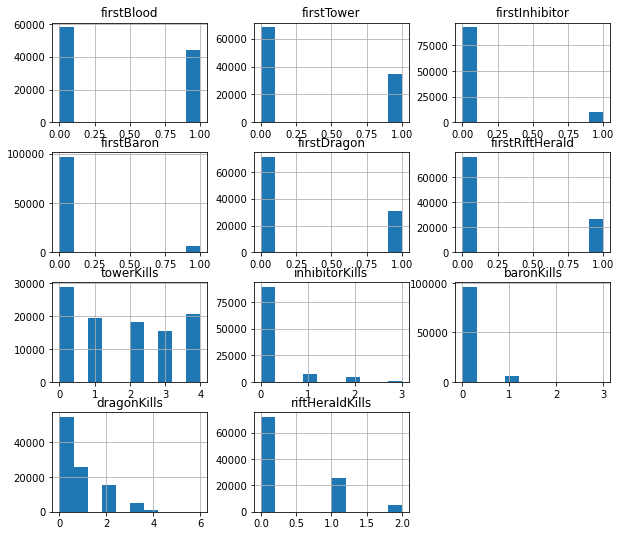

In [404]:
pd.DataFrame(X_train).hist(figsize=(10,9))

In [405]:
Xpd = pd.DataFrame(X_scaled)
Xpd

,0,1,2,3,4,5,6,7,8,9,10
0,1.0,1.0,1.0,0.0,1.0,0.0,0.666667,1.0,0.0,2.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,-0.666667,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,-0.666667,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,-0.666667,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,-0.666667,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
102492,1.0,0.0,0.0,0.0,1.0,1.0,-0.333333,0.0,0.0,2.0,1.0
102493,1.0,0.0,0.0,0.0,0.0,0.0,-0.666667,0.0,0.0,0.0,0.0
102494,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0
102495,0.0,0.0,0.0,0.0,1.0,0.0,-0.666667,0.0,0.0,1.0,0.0


In [406]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)
rf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

y_pred_rf = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_rf)

#oob_score = out of bag score, 예측 정확도에 대한 추정치
print(f'RandomForestClassifier Out-of-bag score estimate: {rf.oob_score_:.3}')
print(f'RandomForestClassifier Mean accuracy score: {accuracy:.3}')

RandomForestClassifier Out-of-bag score estimate: 0.87
RandomForestClassifier Mean accuracy score: 0.871


In [407]:
rf.feature_importances_

array([0.02627783, 0.1647069 , 0.08730949, 0.01385865, 0.0394036 ,
       0.01063492, 0.33863777, 0.18807004, 0.01519748, 0.08853273,
       0.02737059])

<AxesSubplot:title={'center':'RandomForestClassifier Feature Importances'}>

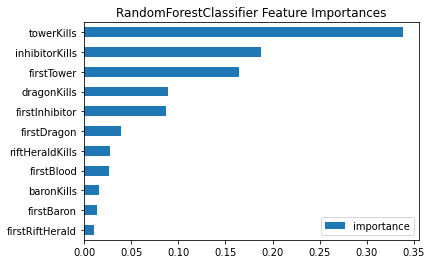

In [408]:
importance = pd.DataFrame(rf.feature_importances_, index=X_train.columns, columns=["importance"]).sort_values(by="importance",ascending =True)
importance.plot.barh(title='RandomForestClassifier Feature Importances')

In [409]:
from sklearn.ensemble import GradientBoostingClassifier
clf_gbc = GradientBoostingClassifier()
clf_gbc.fit(X_train,y_train)

y_pred_clf = clf_gbc.predict(X_test)

print('GradientBoostingClassifier Test Accuracy = ' + str(accuracy_score(y_test,y_pred_clf)))

GradientBoostingClassifier Test Accuracy = 0.8680975609756097


In [410]:
clf_gbc.feature_importances_

array([0.01366432, 0.1506843 , 0.01502336, 0.01285503, 0.04665605,
       0.0007584 , 0.57697329, 0.1278591 , 0.00485399, 0.04421684,
       0.00645532])

<AxesSubplot:title={'center':'GradientBoostingClassifier Feature Importances'}>

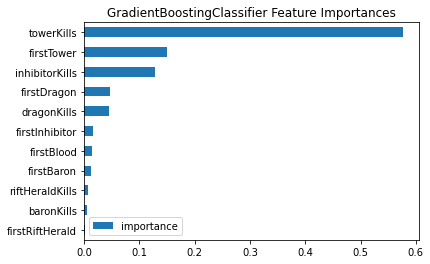

In [411]:
importance = pd.DataFrame(clf_gbc.feature_importances_, index=X_train.columns, columns=["importance"]).sort_values(by="importance",ascending =True)
importance.plot.barh(title='GradientBoostingClassifier Feature Importances')

In [412]:
# !pip install xgboost
import warnings


warnings.filterwarnings(action='ignore')

In [413]:
from xgboost import XGBClassifier
import xgboost as xgb
from xgboost import plot_importance
from matplotlib import pyplot

#xgb로 학습시키기 위해서는 데이터 형식을 float로 변환
X_train[['towerKills', 'inhibitorKills', 'baronKills', 'dragonKills', 'riftHeraldKills']] = X_train[['towerKills', 'inhibitorKills', 'baronKills', 'dragonKills', 'riftHeraldKills']].astype('float')
X_test[['towerKills', 'inhibitorKills', 'baronKills', 'dragonKills', 'riftHeraldKills']] = X_test[['towerKills', 'inhibitorKills', 'baronKills', 'dragonKills', 'riftHeraldKills']].astype('float')

xgb_model = XGBClassifier()
xgb_model.fit(X_train,y_train)
y_pred_xgb = xgb_model.predict(X_test)

print('XGBClassifier Test Accuracy = ' + str(accuracy_score(y_test,y_pred_xgb))) #정확도 계산

[16:04:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier Test Accuracy = 0.8732487804878049


In [414]:
xgb_model.feature_importances_

array([0.01664275, 0.17585127, 0.03112256, 0.02427532, 0.07020946,
       0.00767549, 0.4425047 , 0.18049692, 0.01114543, 0.02675633,
       0.01331975], dtype=float32)

<AxesSubplot:title={'center':'XGBClassifier Feature Importances'}>

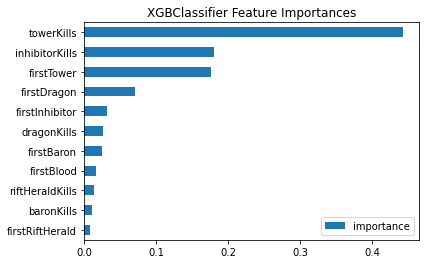

In [415]:
importance = pd.DataFrame(xgb_model.feature_importances_, index=X_train.columns, columns=["importance"]).sort_values(by="importance",ascending =True)
importance.plot.barh(title='XGBClassifier Feature Importances')

In [416]:
# from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression()
reg.fit(X_train, y_train)

from sklearn.model_selection import cross_val_score
cross_val_score(LogisticRegression(), X_train, y_train)

array([0.84902439, 0.8475122 , 0.85091956, 0.84989512, 0.84755354])